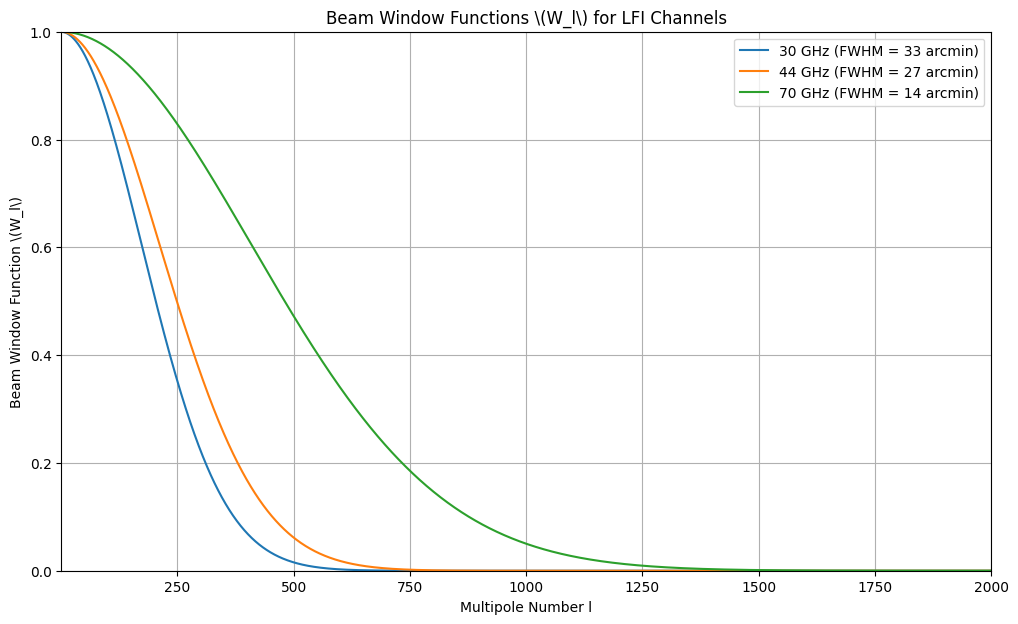

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

# Frequencies for LFI channels (in GHz)
frequencies = [30, 44, 70]
# Beam FWHM for each frequency (in arcminutes)
beam_fwhm = {30: 33, 44: 27, 70: 14}

# Convert arcminutes to radians
def arcmin_to_radians(arcmin):
    return np.radians(arcmin / 60)

# Define a range of l values
lmax = 2000
l_values = np.arange(0, lmax + 1)  # Start from l=0 to match healpy output

# Plot the Beam Window Functions W_l for each LFI channel
plt.figure(figsize=(12, 7))

for freq in frequencies:
    fwhm_rad = arcmin_to_radians(beam_fwhm[freq])
    bl = hp.sphtfunc.gauss_beam(fwhm_rad, lmax=lmax, pol=False)
    Wl = bl**2  # Squaring B_l to get W_l
    plt.plot(l_values, Wl, label=f'{freq} GHz (FWHM = {beam_fwhm[freq]} arcmin)')

plt.xlabel('Multipole Number l')
plt.ylabel('Beam Window Function \(W_l\)')
plt.title('Beam Window Functions \(W_l\) for LFI Channels')
plt.legend()
plt.grid(True)
plt.xlim(1, 2000)  # Adjust x-axis to start from l=1 for clarity
plt.ylim(0, 1)
plt.show()


